In [45]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [46]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True
)

In [47]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [48]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [49]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [50]:
train_data.targets.size()

torch.Size([60000])

In [51]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [33]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(train_data, batch_size=100, shuffle=True, num_workers = 1),
    'test': DataLoader(test_data, batch_size=100, shuffle=True, num_workers = 1)
}

In [52]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f77607e5660>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f77607e6380>}

In [56]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1,10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.dropout(x, training = self.training)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)

    return F.softmax(x)



In [65]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t: {loss.item():.6f}')

def test():
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(loaders['test'].dataset)
  print(f'\nTest set: Average Loss: {test_loss:.4f}, Accuracy {correct} / {len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')




In [66]:
for epoch in range(1,11):
  train(epoch)
  test()

<ipython-input-56-c1a8a0587757>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	: 2.303828
Train Epoch: 1 [2000/60000 (3%)]	: 2.291062
Train Epoch: 1 [4000/60000 (7%)]	: 2.165785
Train Epoch: 1 [6000/60000 (10%)]	: 1.928823
Train Epoch: 1 [8000/60000 (13%)]	: 1.812193
Train Epoch: 1 [10000/60000 (17%)]	: 1.846479
Train Epoch: 1 [12000/60000 (20%)]	: 1.764896
Train Epoch: 1 [14000/60000 (23%)]	: 1.758268
Train Epoch: 1 [16000/60000 (27%)]	: 1.742233
Train Epoch: 1 [18000/60000 (30%)]	: 1.797929
Train Epoch: 1 [20000/60000 (33%)]	: 1.703993
Train Epoch: 1 [22000/60000 (37%)]	: 1.697145
Train Epoch: 1 [24000/60000 (40%)]	: 1.737003
Train Epoch: 1 [26000/60000 (43%)]	: 1.721033
Train Epoch: 1 [28000/60000 (47%)]	: 1.678822
Train Epoch: 1 [30000/60000 (50%)]	: 1.685756
Train Epoch: 1 [32000/60000 (53%)]	: 1.731870
Train Epoch: 1 [34000/60000 (57%)]	: 1.662343
Train Epoch: 1 [36000/60000 (60%)]	: 1.744050
Train Epoch: 1 [38000/60000 (63%)]	: 1.673689
Train Epoch: 1 [40000/60000 (67%)]	: 1.694944
Train Epoch: 1 [42000/60000 (70%)]	: 1.718671

In [67]:
device

device(type='cpu')

<ipython-input-56-c1a8a0587757>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Predicition: 6


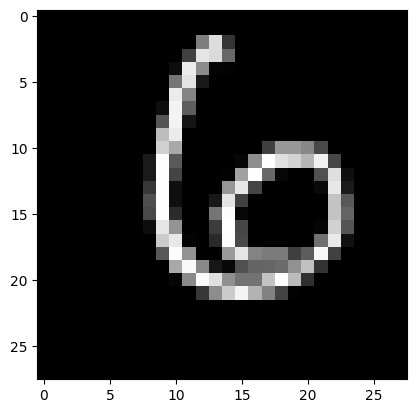

6


In [70]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[100]

data = data.unsqueeze(0).to(device)

output = model(data)

pred = output.argmax(dim = 1, keepdim=True).item()

print(f'Predicition: {pred}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap = 'gray')
plt.show()

print(pred)